# Exploratory Data Analysis

## Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import Data

In [2]:
df = pd.read_csv('datasets/twitch-data-cleaned.csv')
df.head()

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1.032694e+08,3587.50,483.570732,53.629351,0.008538
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,1.015280e+08,3530.75,388.071656,65.470013,0.004823
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,9.407652e+07,8588.00,119.210410,100.228279,0.006209
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,6.617197e+07,8629.00,81.583729,151.348098,0.001955
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6.118333e+07,2061.00,1003.602135,38.192647,0.003312


In [3]:
# Summary Statistics
numerical_df = df[['watch_time_minutes', 'stream_time_minutes', 'peak_viewers', 'average_viewers', 'followers', 'followers_gained', 'views_gained', 'watch_time_hours', 'stream_time_hours', 'followers_per_hour', 'views_per_follower', 'engagement_rate']]
df.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07,6.973799e+06,2008.586000,214.362221,197.545130,0.012748
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07,9.160592e+06,1422.936689,599.403079,1165.579838,0.026158
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05,2.036548e+06,57.750000,-5.021730,-784.087512,0.000397
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06,2.719832e+06,1229.312500,20.544001,31.185667,0.004898
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06,3.916513e+06,1804.000000,57.243064,69.964831,0.008291
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07,7.228999e+06,2364.062500,166.640747,155.014345,0.013810
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08,1.032694e+08,8690.750000,11772.973312,33552.612613,0.637848


ERROR! Session/line number was not unique in database. History logging moved to new session 8


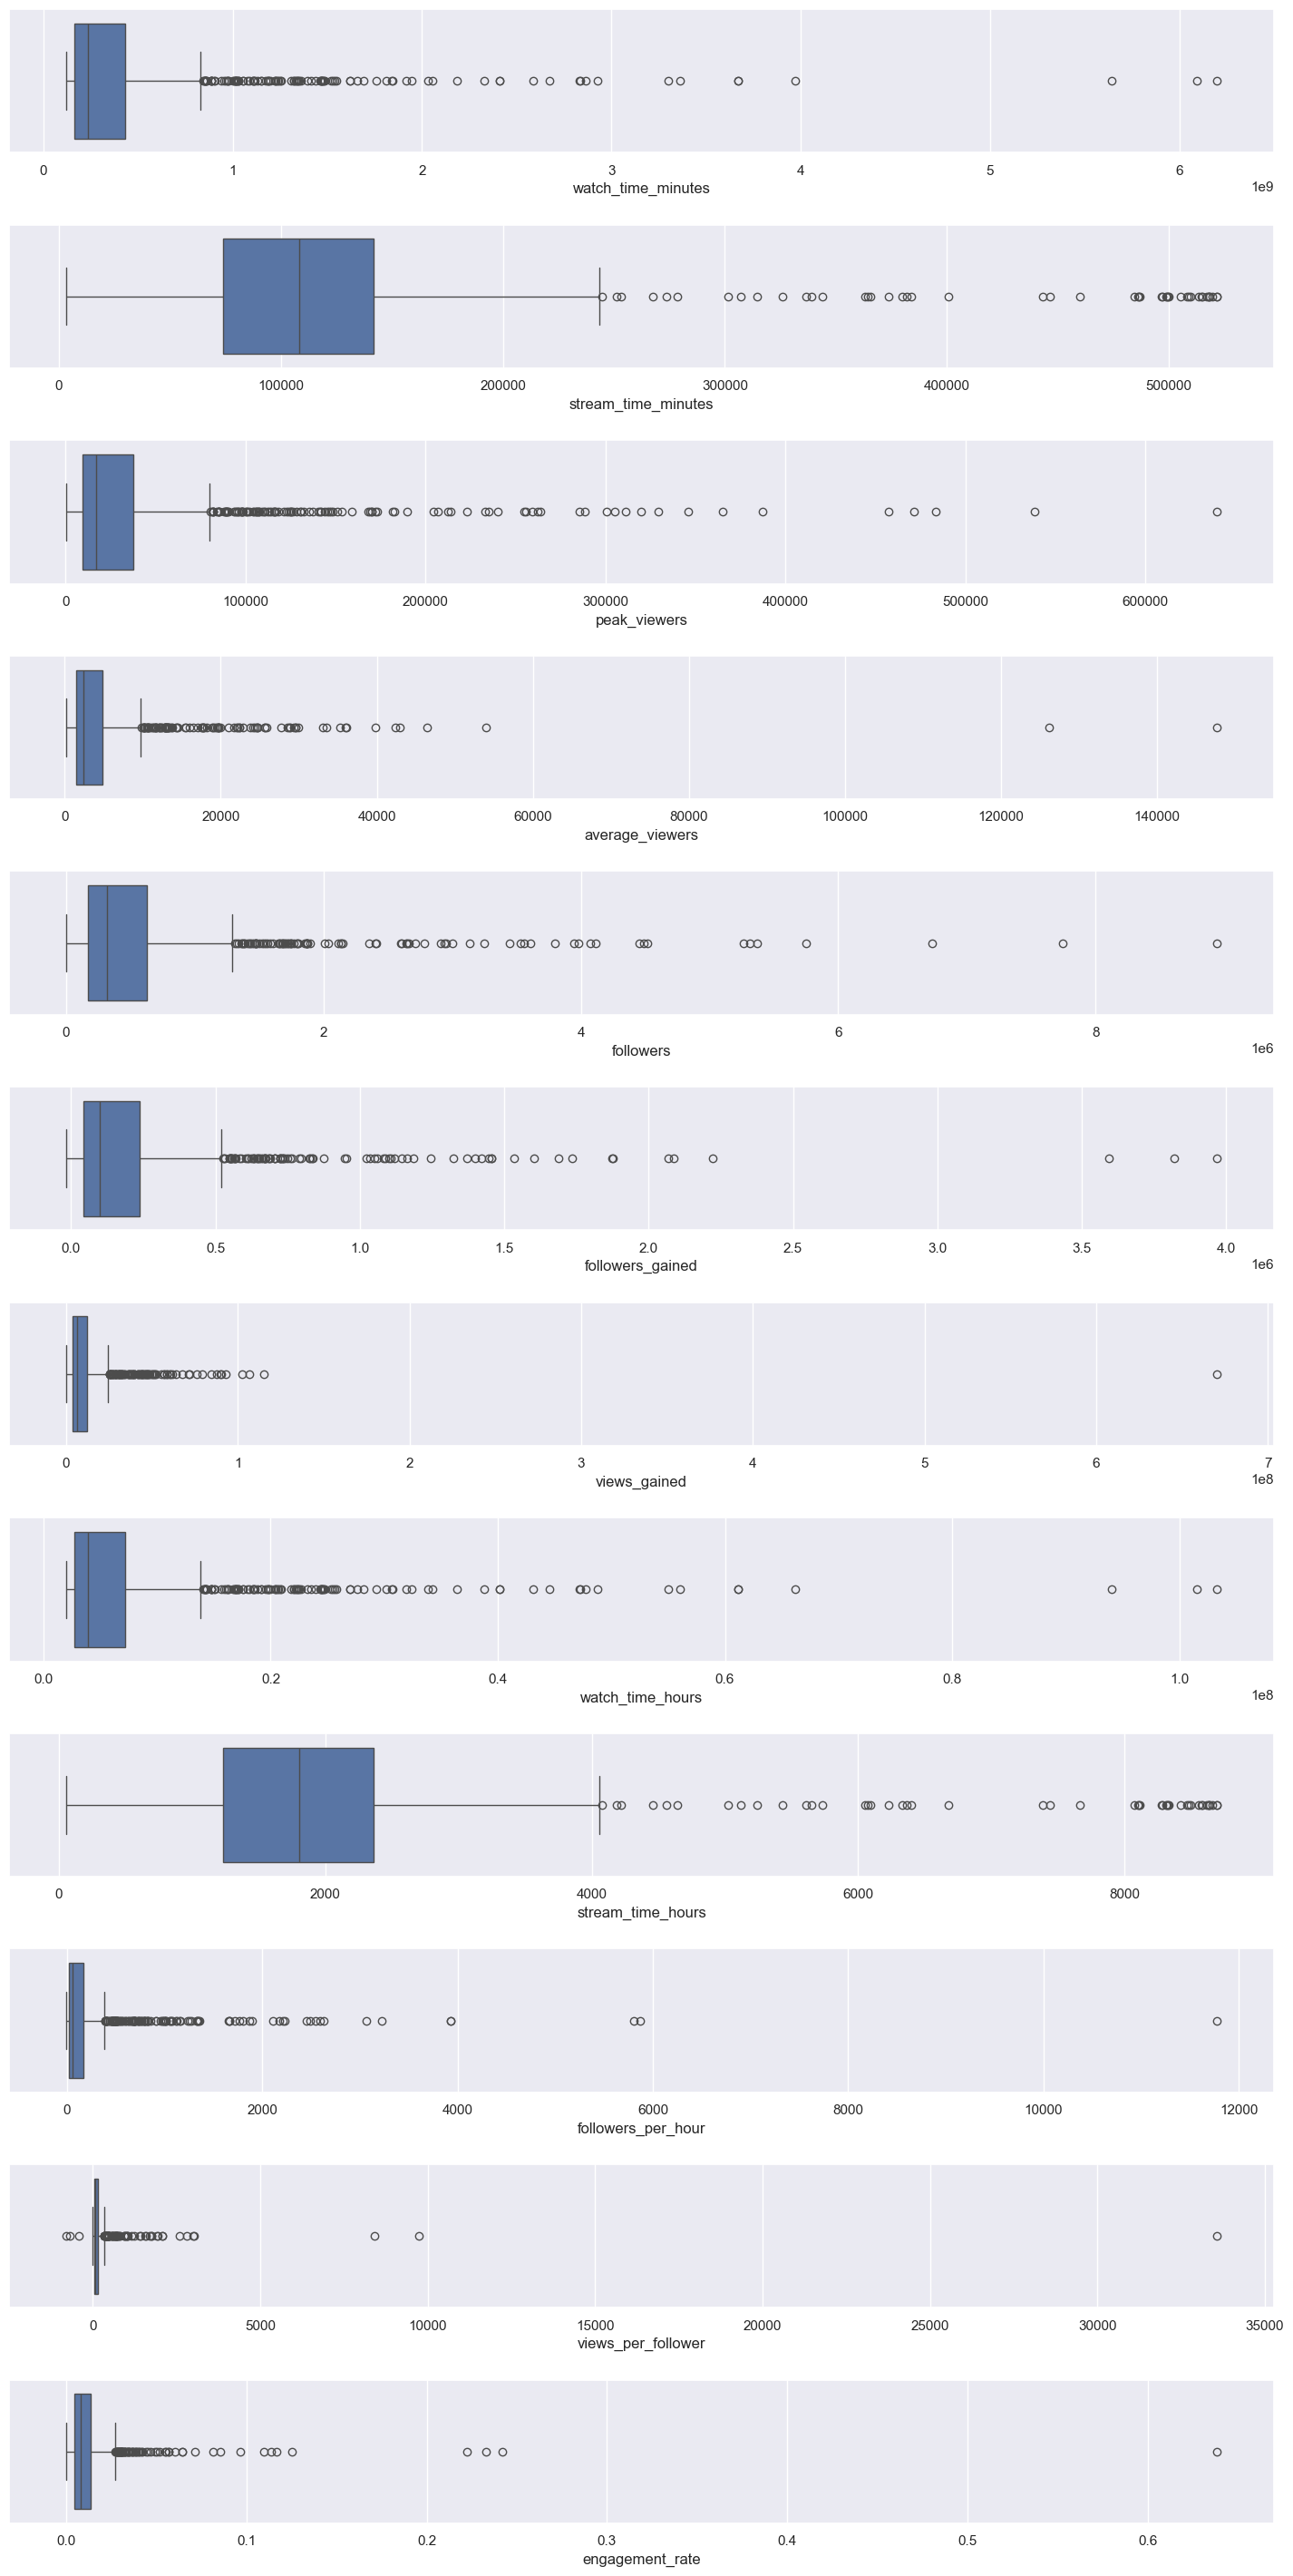

In [4]:
# Draw the distributions of all variables
f, axes = plt.subplots(len(numerical_df.columns), 1, figsize=(18, 36))
# add a space between the subplots
f.subplots_adjust(hspace=0.5)
count = 0

for var in numerical_df:
  # check if var is numeric
  if df[var].dtype != 'object' and df[var].dtype != 'bool':
    sb.boxplot(data=df[var], orient='h', ax=axes[count])
    count += 1

Looking at these graphs, they show a very positive-skewed (distribution is very weighted towards 0) tendency for all the metrics. Any of these metrics may provide very interesting results to look at, but first, we want to remove some potential outliers that may affect our result, like any channels that stream tournaments such as eSports which will likely have very sporadic times when they stream tournaments (it is unlikely that tournaments are streamed every day), so results from these channels may skew our results which is why we want to remove them from our dataset.

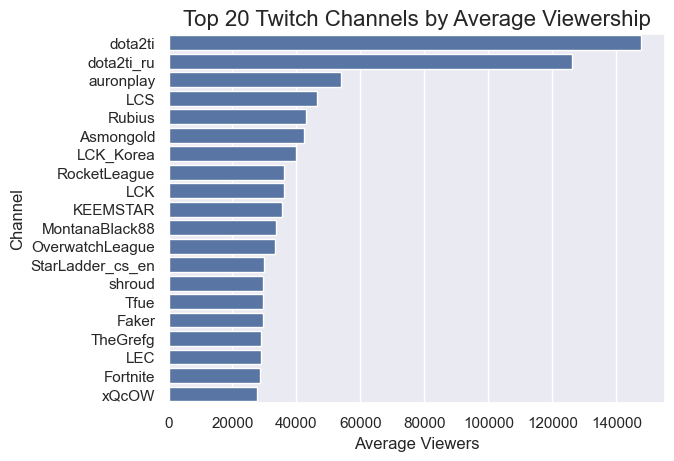

In [5]:
average_viewers = df.sort_values(by='average_viewers', ascending=False).head(20)

sb.barplot(x='average_viewers', y='channel', data=average_viewers)
plt.title('Top 20 Twitch Channels by Average Viewership', fontsize=16)
plt.xlabel('Average Viewers')
plt.ylabel('Channel')
plt.show()


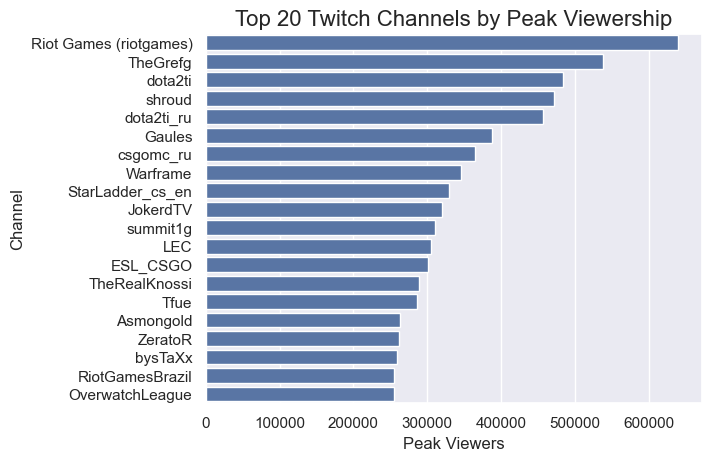

In [6]:
peak_viewers = df.sort_values(by='peak_viewers', ascending=False).head(20)

sb.barplot(x='peak_viewers', y='channel', data=peak_viewers)
plt.title('Top 20 Twitch Channels by Peak Viewership', fontsize=16)
plt.xlabel('Peak Viewers')
plt.ylabel('Channel')
plt.show()

For example, channels like dota2ti, Riot Games, ESL_CSGO, and RocketLeague likely all stream when tournaments happen, but otherwise would not be streaming at all, and they are not particularly single streamers streaming, but a whole company streaming their game tournament. This would not be helpful when we want to predict the popularity of a streamer based on their streaming habits and engagement metrics since including these channels could skew results towards channels that are not representative of a "typical" streamer.

In [7]:
# lets remove the eSports tournament outlier channels
# done to our best ability (manually removed common eSports titles that were in the list, so some channels may still exist)
tournament_channels = [ 
                        'btscsgo',
                        'btssmash',
                        'Call of Duty (callofduty)',
                        'CapcomFighters',
                        'dota2mc_ru',
                        'dota2ti',
                        'dota2ti_ru',
                        'DreamHackCS',
                        'DreamHackDota2_RU',
                        'DreamLeague',
                        'EAMaddenNFL',
                        'EASPORTSFIFA',
                        'ESAMarathon',
                        'ESL_CSGO',
                        'ESL_CSGO_FR',
                        'ESL_CSGOb',
                        'ESL_DOTA2',
                        'ESL_SC2',
                        'LCK',
                        'LCK_Korea',
                        'LCS',
                        'NBA2KLeague',
                        'OverwatchLeague',
                        'PG_Esports',
                        'PlayHearthstone',
                        'PUBG',
                        'Riot Games (riotgames)',
                        'RiotGamesBrazil',
                        'RiotGamesJP',
                        'RiotGamesOCE',
                        'RiotGamesRU',
                        'RiotGamesTurkish',
                        'RocketLeague',
                        'StarCraft',
                        'StarLadder5',
                        'StarLadder_cs_en',
                        'Twitch',
                        'TwitchRivals',
                        'UCCleague',
                        'Warcraft',
                        'WePlayEsport_EN',
                        'WePlayEsport_RU',
                      ]

# drop the tournament channels
df = df[~df['channel'].isin(tournament_channels)]
df

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,watch_time_hours,stream_time_hours,followers_per_hour,views_per_follower,engagement_rate
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1.032694e+08,3587.50,483.570732,53.629351,0.008538
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,1.015280e+08,3530.75,388.071656,65.470013,0.004823
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,9.407652e+07,8588.00,119.210410,100.228279,0.006209
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6.118333e+07,2061.00,1003.602135,38.192647,0.003312
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English,6.114665e+07,1371.00,404.231218,111.359924,0.027129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,2.042077e+06,226.00,2489.783186,3.842441,0.015125
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,2.042062e+06,2550.00,20.505490,84.145748,0.003719
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,2.040872e+06,3623.50,-1.363875,-691.616754,0.005199
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2.038518e+06,1745.75,62.500931,35.990120,0.002106


## Analysis of Numeric Variables
In order to analyze the relationship between various numeric variables and watch time, we create a heatmap to show their relationships.

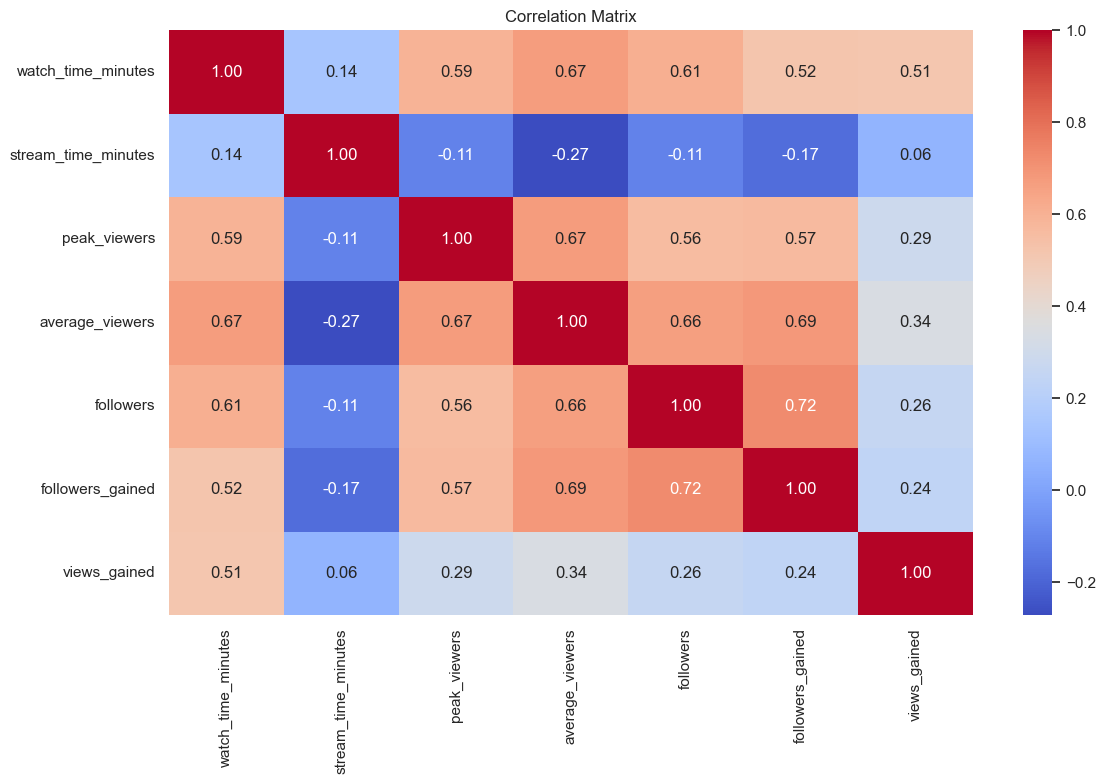

In [8]:
# Create a correlation matrix for the numeric values in the dataset
numerical_df_reduced = df[['watch_time_minutes', 'stream_time_minutes', 'peak_viewers', 'average_viewers', 'followers', 'followers_gained', 'views_gained']]
correlation_matrix = numerical_df_reduced.corr()

plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Looking at this heatmap, we see that:
- Stream time has very little correlation. This indicates that just because a streamer streams for a longer period of time does not mean that they will have a greater watch time.
- Peak viewers and average viewers show moderate correlation with watch time, followers, and followers gained. This shows that streamers who have a higher amount of views during peak time or on average are more likely to have greater watch time, already have a following, and gain followers.
- Followers and followers gained have a moderate-high correlation with watch time. This indicates that streamers that have a larger following base or with high following growth are more likely to have a higher watch time.

## Analysis of Categorical Variables
Now, we will analyze other variables like Partnered, Mature, and Language. These variables are not numerical and thus will be analyzed separately from the previous heatmap.

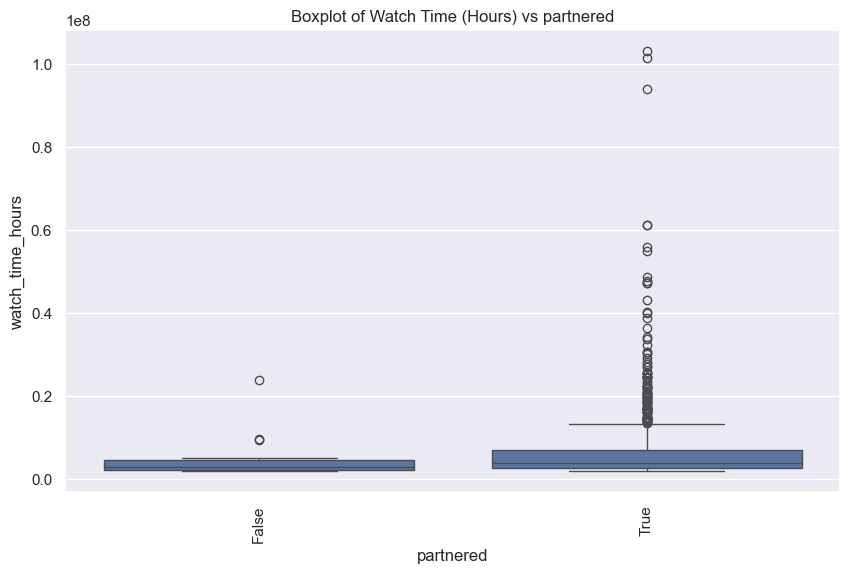

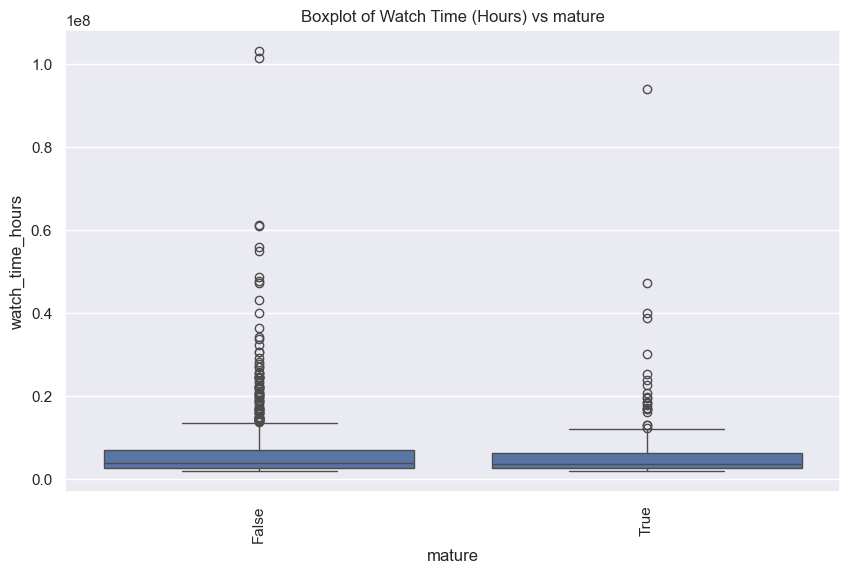

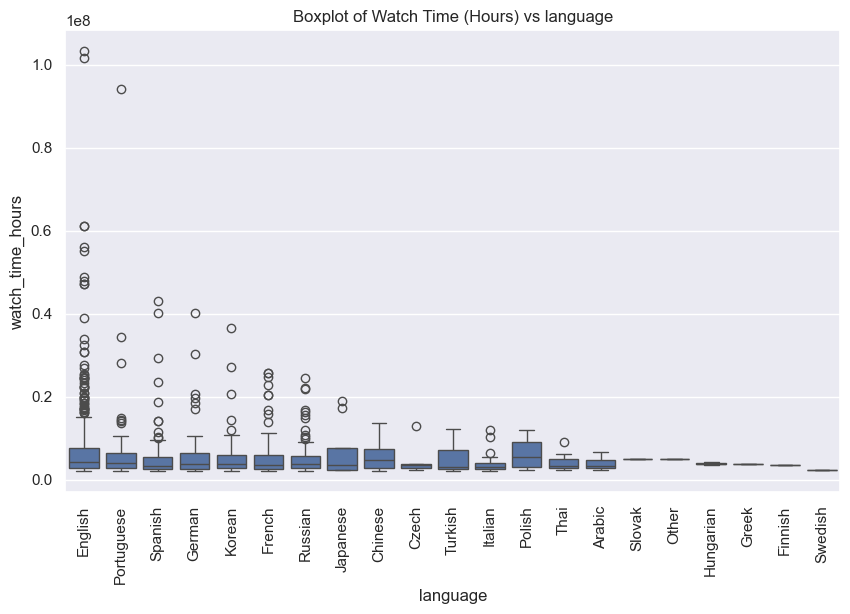

In [9]:
categorical_variables = ['partnered', 'mature', 'language']
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=var, y='watch_time_hours', data=df)
    plt.title(f'Boxplot of Watch Time (Hours) vs {var}')
    plt.xticks(rotation=90)
    plt.show()
